In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


# Getting Betas
def getBeta(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    #print(info)
    return info.get("beta")

    
def getPE(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    #print(info)
    return info.get("forwardPE")

    
def tenYearReturnsandVol(tick):
    stock = yf.Ticker(tick)
    data = stock.history(period="10y")
    data['Year'] = data.index.year
    data = data[["Close","Year"]].copy()
    data2 = data.groupby("Year").apply(lambda x: ((x.iloc[-1,0] - x.iloc[0,0]) /  x.iloc[0,0]) , include_groups=False)
    return data2.mean() , data2.std()

    
def getGM(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    #print(info)
    return info.get("grossMargins")
def getRG(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    #print(info)
    return info.get("revenueGrowth")

def getData(ticker,information):
    stock = yf.Ticker(ticker)
    info = stock.info
    #print(info)
    return info.get(information)

def graphData(data , weightedMean):
    sortedDE = ESNData.sort_values(by = data, ascending = True).copy()
    holdings = list(sortedDE["Tickers"])
    sortedListDE = list(sortedDE[data])
    
    #print(sortedDE)
    i = 0
    fig , ax = plt.subplots()
    for tick in holdings:
        if sortedListDE[i] > 0:
            ax.bar(height = sortedListDE[i] ,x = i, color = "Green")
        elif sortedListDE[i] == 0.0:
                l = tick + " : "+str(sortedListDE[i])
                ax.bar(height = sortedListDE[i] ,x = i, color = "Grey", label = l)

        else:
             l = tick + " : "+str(sortedListDE[i])
             ax.bar(height = sortedListDE[i] ,x=i, color = "Red", label = l)
    
        i+=1   
    l = "Weighted Average Mean: " +str(weightedMean)        
    ax.bar(height = weightedMean, x = 41, label = l, color = "blue")
             
        
    #print(colors)
    title = data + ": All stocks in the Essential 40"
    ax.set(xticks = [], title = title )
    ax.grid(True)
    ax.legend()
    plt.show()

def replace_element(list_name, old_value, new_value):
    """
    Replaces all occurrences of a value in a list with a new value.

    Args:
        list_name: The list in which to replace the element.
        old_value: The value to be replaced.
        new_value: The new value to replace the old value with.
    """
    for i in range(len(list_name)):
        if list_name[i] == old_value:
            list_name[i] = new_value

def getRV(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period="10y")
    close = list(df["Close"])
    returns = []
    ci = close[0]
    for c in close:
        r = ((c - ci) / ci)
        ci = c
        returns.append(r)
    df["Daily returns"] = returns
    meanReturn = 100 * df["Daily returns"].mean() 
    vol = 100 * df["Daily returns"].std()
    return meanReturn, vol




ESN = yf.Ticker('ESN').funds_data
print(ESN.description)





The fund is an actively-managed exchange-traded fund (“ETF”) that normally invests at least 80% of its net assets in the common stocks of companies that comprise the Essential 40 Stock Index, which measures the investment return of the equity securities of forty blue-chip U.S. companies. Generally, the adviser anticipates that the fund will hold all forty of the securities that comprise the index in proportion to their weightings in the index.


In [5]:
dfHoldings = pd.read_csv("Essential_40_ETF_Holdings_05-14-2025.csv")

In [7]:
totalHoldings = list(dfHoldings["Ticker"])
replace_element(totalHoldings, "BRK/B", "BRK-B")
totalHoldings = totalHoldings[0:-4]
print(len(totalHoldings))



holdingsPercentsFake = dfHoldings["Percentage of Net Assets"]
holdingsPercents = []
for h in holdingsPercentsFake:
    h = float(h[:-1])
    h = h / 100
    holdingsPercents.append(h)
holdingsPercents = holdingsPercents[:-4]
print(len(holdingsPercents))

40
40


In [9]:
# Weighted Average D/E
totalDebt = 0 
totalEquity = 0
i = 0
listDE = []



for tick in totalHoldings:
    #print(tick)
    ticker_object = yf.Ticker(tick)
    balancesheet = ticker_object.balancesheet
    debt = balancesheet.loc['Total Debt'].copy()
    equity = balancesheet.loc['Stockholders Equity'].copy()
    currentDebt = debt.iloc[0]
    currentEquity = equity.iloc[0]
    if currentEquity == 0:
        equity = balancesheet.loc['Common Stock Equity'].copy()
        currentEquity = equity.iloc[0]
    
    totalDebt += (currentDebt * holdingsPercents[i])
    totalEquity += (currentEquity * holdingsPercents[i]) 
    i+=1
    #print(currentDebt , currentEquity)
    Dei = float (currentDebt / currentEquity )
    listDE.append(Dei)
    
    
ESNData = {"Tickers" : totalHoldings ,"D/E" : listDE ,"Holdings Percents" : holdingsPercents }
ESNData = pd.DataFrame(ESNData)

print("Weighted Average D/E:" ,  totalDebt / totalEquity)


Weighted Average D/E: 0.6965163238292162


In [374]:
betas = []
returns = []
vol = []
PE = []
GM = []
RG = []
s = []
e = []
o = []
a = []
b = []
roes = []
name = []
for tick in ESNData["Tickers"]:
    betas.append(getBeta(tick))
    PE.append(getPE(tick))
    r , sd = tenYearReturnsandVol(tick)
    returns.append(r)
    vol.append(sd)
    GM.append(getGM(tick))
    RG.append(getRG(tick))
    s.append(getData(tick, 'sector'))
    e.append(getData(tick , "ebitdaMargins"))
    o.append(getData(tick, "operatingMargins"))
    a.append(getData(tick, "returnOnAssets"))
    b.append(getData(tick , "payoutRatio"))
    roes.append(getData(tick , "returnOnEquity"))
    name.append(getData(tick , "longName"))
ESNData["Name"] = name
ESNData["Beta"] = betas
ESNData["P/E"] = PE
ESNData["Average Annual Return"] = returns
ESNData["Volatility"] = vol
ESNData["Return on Equity"] = roes
ESNData["Return on Assets"] = a
ESNData["Payout Ratio"] = b
ESNData["Revenue Growth"] = RG
ESNData["Sector"] = s
ESNData["Ebitda Margin"] = e
ESNData["Gross Profit Margin"] = GM
ESNData["Operating Margin"] = o


ESNData

,Tickers,D/E,Holdings Percents,Beta,P/E,Average Annual Return,Volatility,Return on Equity,Return on Assets,Payout Ratio,Revenue Growth,Sector,Ebitda Margin,Gross Profit Margin,Operating Margin,Name
0,IBM,2.138499,0.0291,0.629,24.811972,0.100406,0.200443,0.218510,0.04469,1.1419,0.005,Technology,0.22202,0.57041,0.12399,International Business Machines Corporation
1,BA,-13.865916,0.0286,1.405,438.606380,0.090848,0.343772,NaN,-0.04102,0.0000,0.177,Industrials,-0.11071,-0.01791,0.02765,The Boeing Company
2,V,0.532386,0.0283,0.955,28.747732,0.176577,0.158251,0.506550,0.16936,0.2231,0.093,Financial Services,0.69708,0.97770,0.67073,Visa Inc.
3,CME,0.129422,0.0281,0.466,27.010609,0.169957,0.192161,0.133870,0.01762,1.0563,0.104,Financial Services,0.70434,1.00000,0.67586,CME Group Inc.
4,PANW,0.260054,0.0277,NaN,25.370028,0.251197,0.393345,0.211620,0.03720,0.0000,0.153,Technology,0.16341,0.73562,0.09559,"Palo Alto Networks, Inc."
5,BRK-B,0.192128,0.0276,0.869,25.360558,0.127165,0.121910,0.131870,0.05789,0.0000,-0.002,Financial Services,0.31360,0.27872,0.06998,Berkshire Hathaway Inc.
6,CVS,1.097406,0.0274,0.600,9.612655,0.006293,0.270294,0.069340,0.02309,0.6348,0.069,Healthcare,0.03702,0.13542,0.03500,CVS Health Corporation
7,META,0.268620,0.0272,1.237,25.333994,0.334996,0.625217,0.398350,0.17880,0.0792,0.161,Communication Services,0.51644,0.81767,0.41487,"Meta Platforms, Inc."
8,MMM,3.555180,0.0270,1.076,19.331013,0.062541,0.226086,0.938240,0.05448,0.3524,-0.010,Industrials,0.21735,0.41211,0.20675,3M Company
9,JPM,1.317768,0.0269,1.068,15.817276,0.175890,0.217269,0.173520,0.01413,0.2478,0.048,Financial Services,0.00000,0.00000,0.43342,JPMorgan Chase & Co.


In [13]:
holdings = ESN.sector_weightings
holdings

{'realestate': 0.0,
 'consumer_cyclical': 0.0715,
 'basic_materials': 0.0495,
 'consumer_defensive': 0.0514,
 'technology': 0.1825,
 'communication_services': 0.099300005,
 'financial_services': 0.14140001,
 'utilities': 0.055,
 'industrials': 0.1664,
 'energy': 0.0719,
 'healthcare': 0.1112}

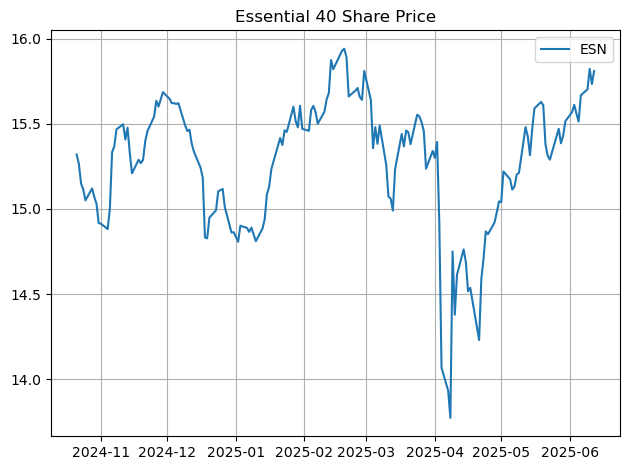

(0.02546343315909322, 1.088569738262872)
(0.05550924800633782, 1.1528968830057809)


In [17]:

ESN = yf.Ticker("ESN")

data = ESN.history(period="2y")


fig , ax = plt.subplots()

ax.plot( data["Close"] , label = "ESN")

ax.set(title = "Essential 40 Share Price")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


print(getRV("ESN"))
print(getRV("SPY"))



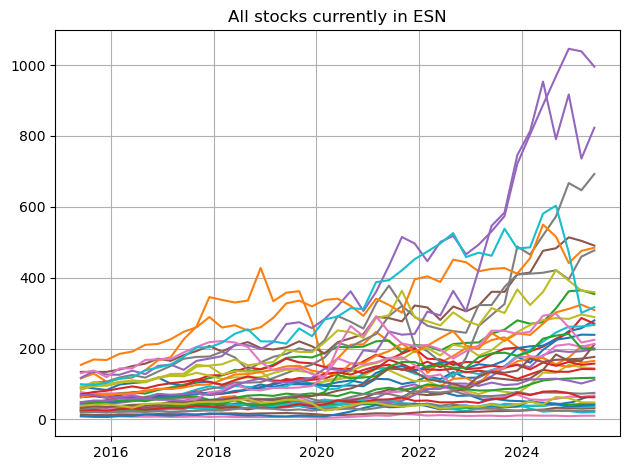

In [19]:


totalHoldings = list(dfHoldings["Ticker"])
replace_element(totalHoldings, "BRK/B", "BRK-B")
    
fig , ax = plt.subplots()
#print(len(totalHoldings[0:-3]))


for tick in ESNData["Tickers"]:
    stocks = yf.Ticker(tick)

    data = stocks.history(period="10y", interval = "3mo") 
   # if data.iloc[0,3] > data.iloc[-1,3]:
    #    c = 'green'
   # else:
   #     c = "red"
    
    ax.plot(data["Close"] , label = tick )
    
    
#ax.legend()
ax.grid(True)
ax.set(title = "All stocks currently in ESN")  
plt.tight_layout()
plt.show()

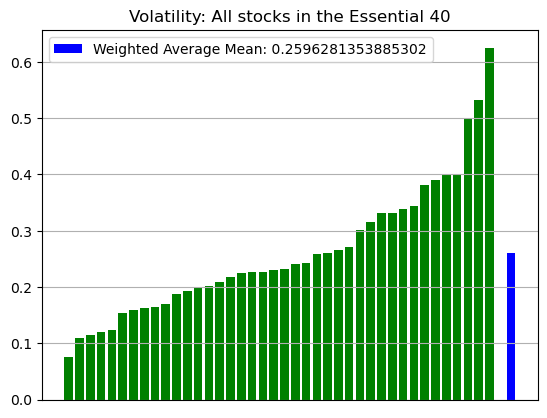

In [93]:
import numpy as np
WAV = np.average(ESNData["Volatility"] , weights = ESNData["Holdings Percents"])

graphData("Volatility" , WAV )

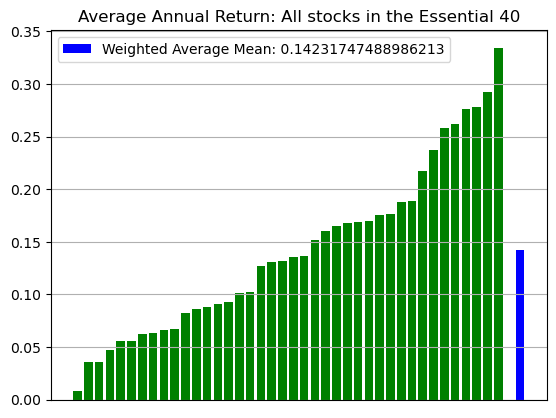

In [97]:
#Average Annual Return


WAAR = np.average(ESNData["Average Annual Return"] , weights = ESNData["Holdings Percents"])

graphData("Average Annual Return" , WAAR )

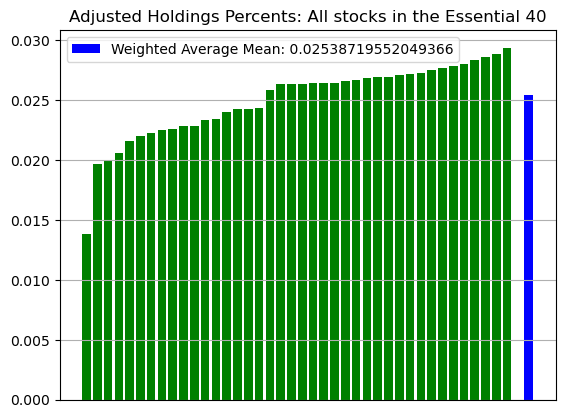

In [109]:
#Holdings Percents

ESNData["Adjusted Holdings Percents"] = ESNData["Holdings Percents"] / ESNData["Holdings Percents"].sum()


WAHP = np.average(ESNData["Adjusted Holdings Percents"] , weights = ESNData["Holdings Percents"])
graphData("Adjusted Holdings Percents" , WAHP )


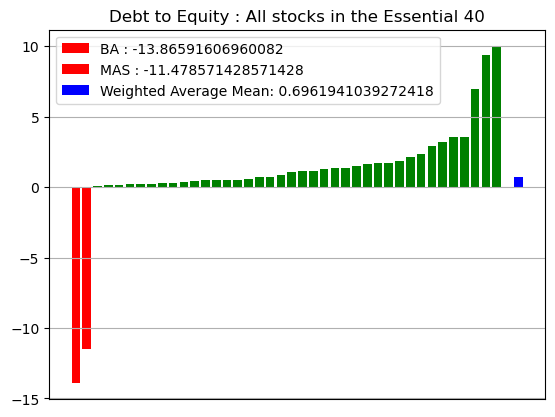

In [980]:

i = 0

sortedDE = ESNData.sort_values(by = "D/E", ascending = True).copy()
holdings = list(sortedDE["Tickers"])
sortedListDE = list(sortedDE["D/E"])

#print(sortedDE)

fig , ax = plt.subplots()
for tick in holdings:
    if sortedListDE[i] > 0:
        ax.bar(height = sortedListDE[i] ,x = i, color = "Green")
    else:
         l = tick + " : "+str(sortedListDE[i])
         ax.bar(height = sortedListDE[i] ,x=i, color = "Red", label = l)

    i+=1   
l = "Weighted Average Mean: " +str(totalDebt / totalEquity)        
ax.bar(height = (totalDebt / totalEquity), x = 41, label = l, color = "blue")
         
    
#print(colors)
ax.set(xticks = [], title = "Debt to Equity : All stocks in the Essential 40" )
ax.grid(True)
ax.legend()
plt.show()



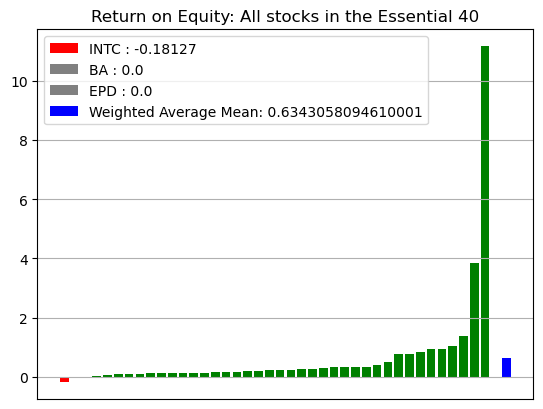

In [984]:

WAROE = np.average(ESNData["Return on Equity"] , weights = ESNData["Holdings Percents"])

graphData("Return on Equity" , WARoE )

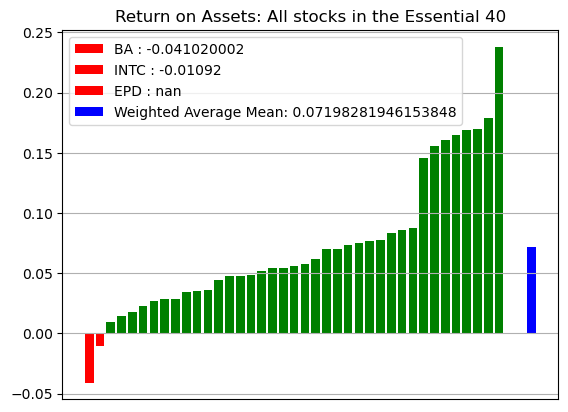

In [986]:
#WARA = np.average(ESNData["Return on Assets"] , weights = ESNData["Holdings Percents"])
WARA = np.nanmean(ESNData["Return on Assets"])


graphData("Return on Assets" , WARA)

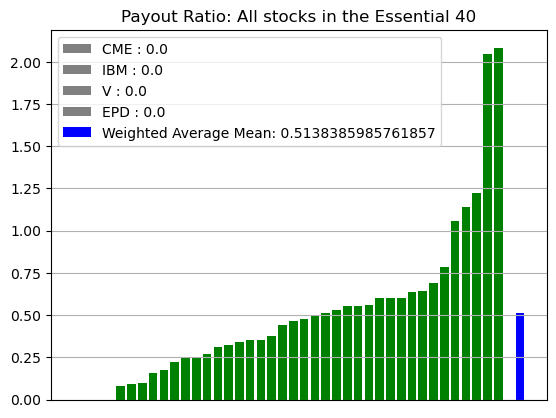

In [990]:
WAB = np.average(ESNData["Payout Ratio"] , weights = ESNData["Holdings Percents"])

graphData("Payout Ratio" , WAB)

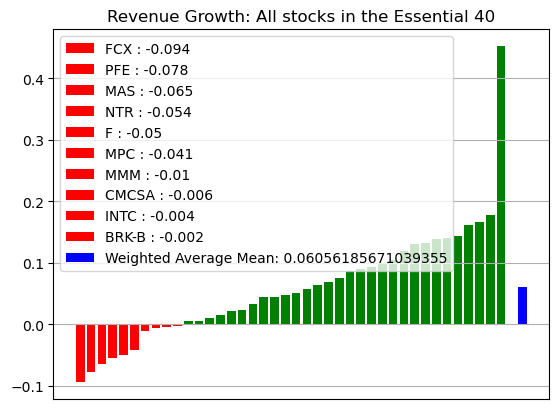

In [992]:
WARG = np.average(ESNData["Revenue Growth"] , weights = ESNData["Holdings Percents"])

graphData("Revenue Growth" , WARG)

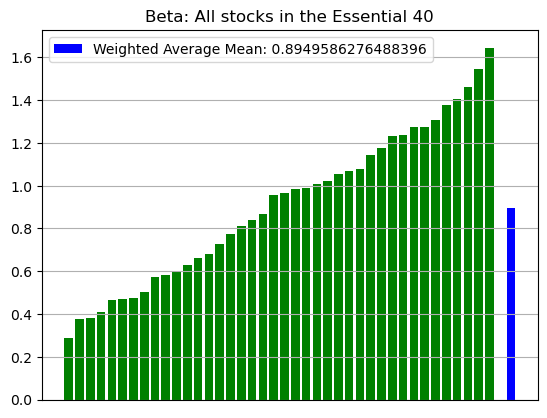

In [994]:
WABeta = np.average(ESNData["Beta"] , weights = ESNData["Holdings Percents"])

graphData("Beta" , WABeta)

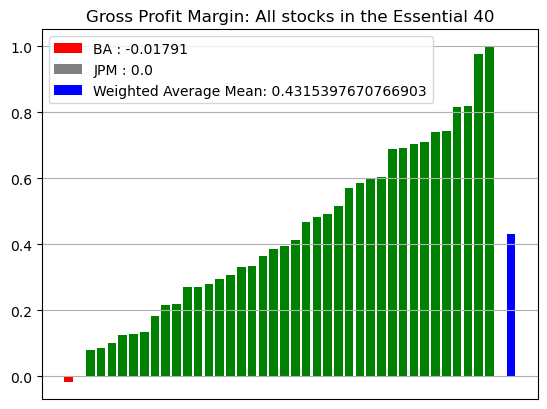

In [996]:
WAGM = np.average(ESNData["Gross Profit Margin"] , weights = ESNData["Holdings Percents"])

graphData("Gross Profit Margin" , WAGM)

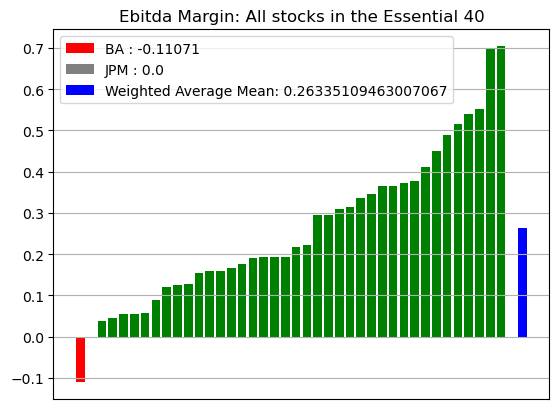

In [1008]:
WAEM = np.average(ESNData["Ebitda Margin"] , weights = ESNData["Holdings Percents"])

graphData("Ebitda Margin" , WAEM)

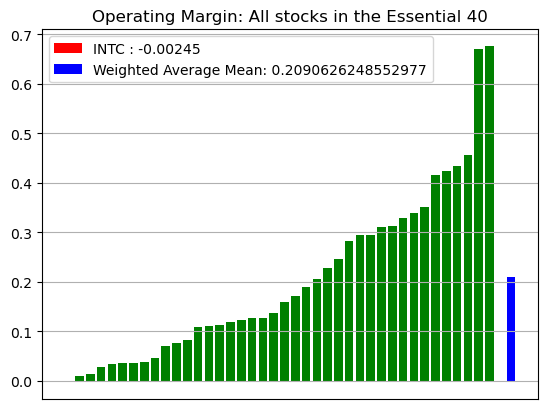

In [998]:
WAOM = np.average(ESNData["Operating Margin"] , weights = ESNData["Holdings Percents"])

graphData("Operating Margin" , WAOM)

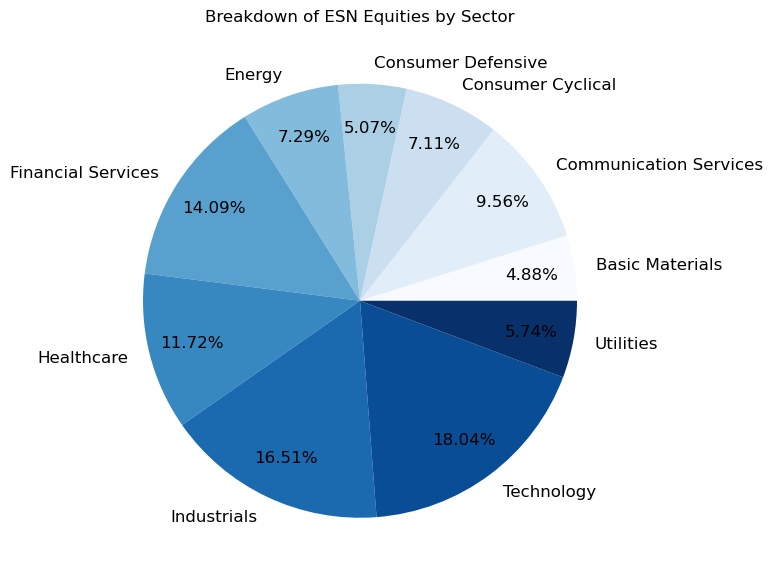

In [1000]:
sectorData = ESNData[["Holdings Percents","Sector"]]
gby = sectorData.groupby("Sector").sum()
gby

fig , ax = plt.subplots(figsize = (7,10))
cmap = plt.cm.Blues
colors = cmap(np.linspace(0, 1, len(gby["Holdings Percents"])))

ax.pie(x = gby["Holdings Percents"] , labels = gby.index, colors=colors, autopct='%1.2f%%', textprops={'fontsize':12}, pctdistance=0.80,)
ax.set(title = "Breakdown of ESN Equities by Sector")
plt.show()

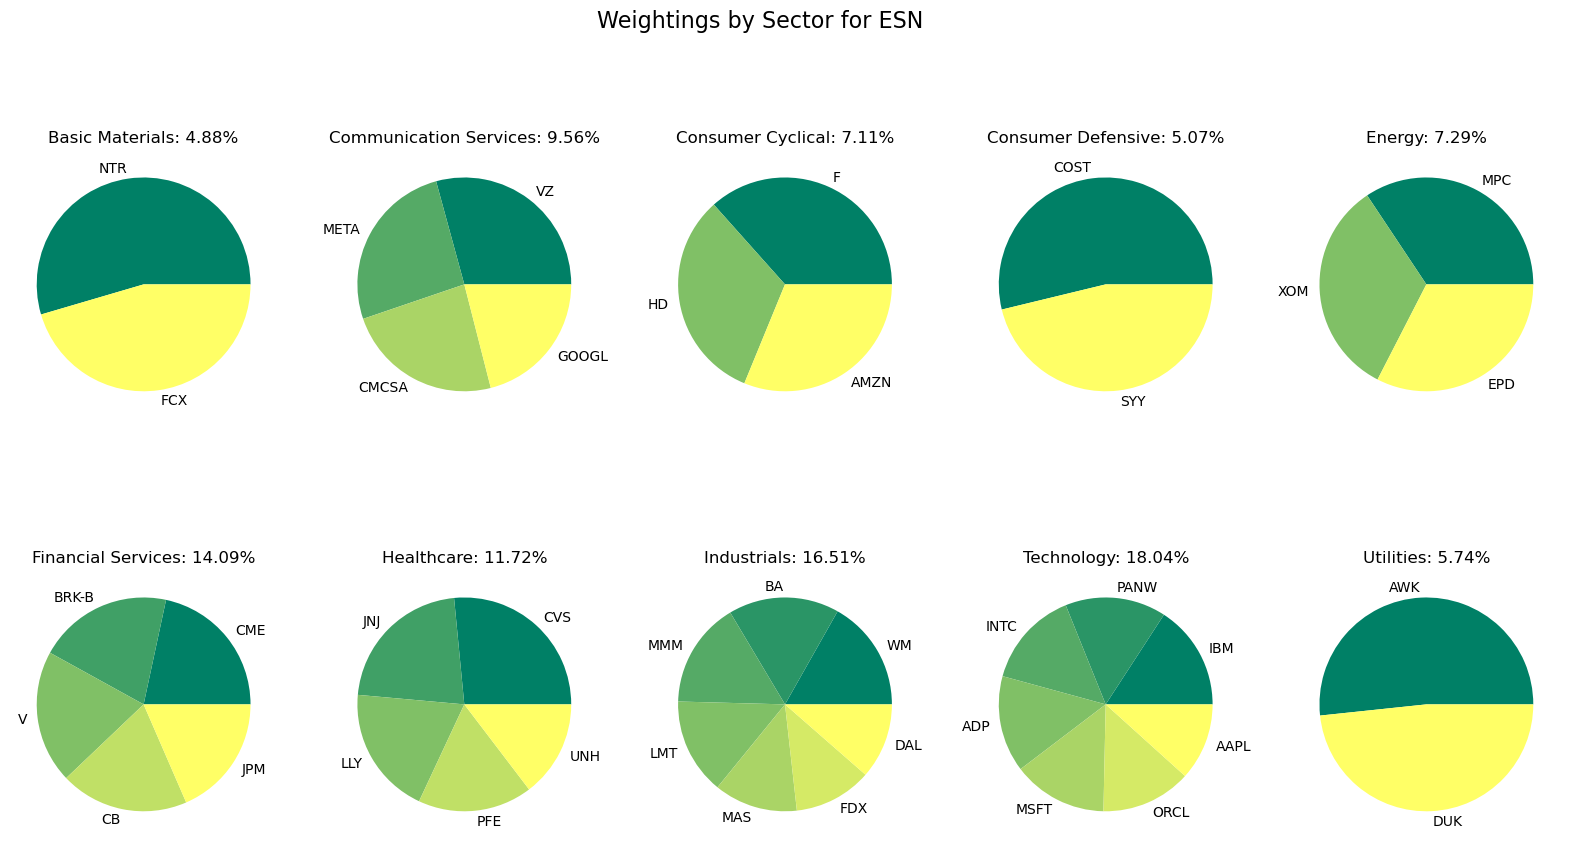

<Figure size 640x480 with 0 Axes>

In [1002]:
sectors = list(gby.index)

sortedESNData = ESNData[["Holdings Percents","Sector","Tickers"]]

fig , ax = plt.subplots(2,5 , figsize = (20,10))
cmap = plt.cm.summer

dataWeights = sectorData.groupby("Sector").sum()
s = dataWeights["Holdings Percents"].sum()


r = 0
c = 0
i = 0
for sector in sectors:
    if r == 5:
        r = 0
        c +=1
        
    data = sortedESNData[sortedESNData["Sector"] == sector].copy()
    colors = cmap(np.linspace(0, 1, len(data["Tickers"])))
  
    ax[c,r].pie(x =  data["Holdings Percents"] , labels =   data["Tickers"], colors=colors)

    w = round( (dataWeights.iloc[i,0] / s)  * 100 , 2)



    
    t = sector + ": " + str(w) + "%"
    ax[c,r].set(title = t)
    r +=1
    i +=1
fig.suptitle('Weightings by Sector for ESN', fontsize=16)
plt.show()
plt.tight_layout()


    
